# Projet Machine-Learning par Antoine Théologien

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from mltools import *

def train_nn(X, y, model, loss, epochs=1000, lr=0.05, batch_size=32):
    losses = []
    n = X.shape[0]  
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)  
        X_shuffled, y_shuffled = X[indices], y[indices]

        epoch_loss = 0
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_hat = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_hat))
            epoch_loss += batch_loss * len(X_batch) / n 

            model.zero_grad()
            model.backward(X_batch, y_batch, loss)
            model.update_parameters(lr)

        losses.append(epoch_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

    return losses, model


Epoch 0: Loss = 0.8444
Epoch 100: Loss = 0.5006
Epoch 200: Loss = 0.5003
Epoch 300: Loss = 0.5002
Epoch 400: Loss = 0.5001
Epoch 500: Loss = 0.5001
Epoch 600: Loss = 0.5001
Epoch 700: Loss = 0.5001
Epoch 800: Loss = 0.5001
Epoch 900: Loss = 0.5001


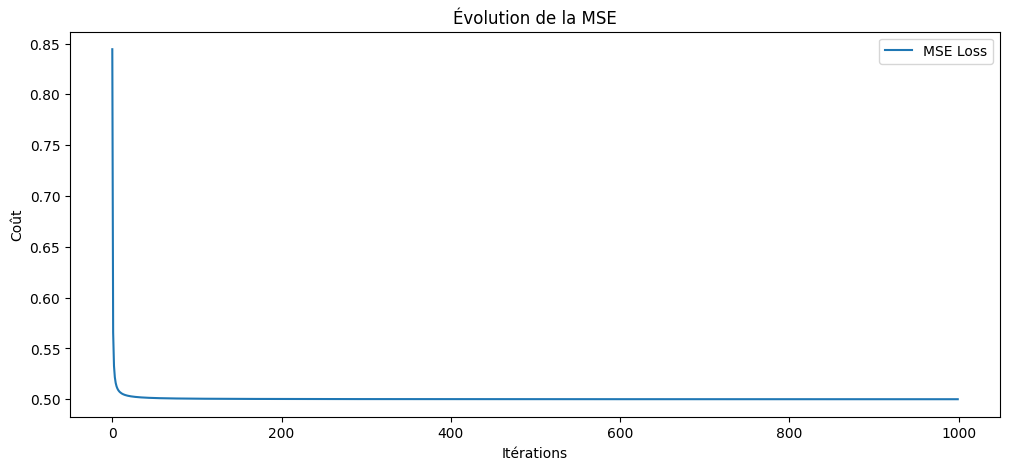

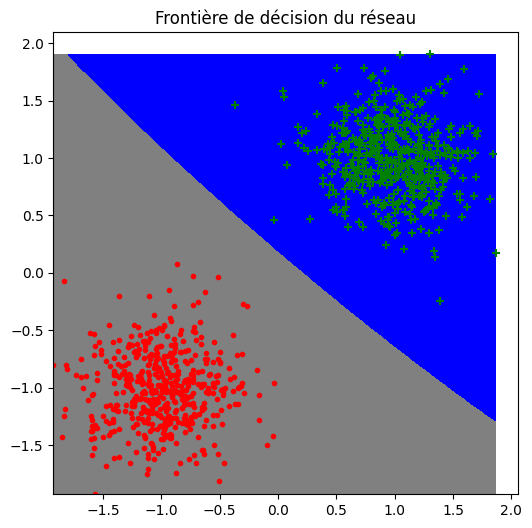

Epoch 0: Loss = 0.8245
Epoch 100: Loss = 0.7523
Epoch 200: Loss = 0.7515
Epoch 300: Loss = 0.7513
Epoch 400: Loss = 0.7512
Epoch 500: Loss = 0.7511
Epoch 600: Loss = 0.7510
Epoch 700: Loss = 0.7510
Epoch 800: Loss = 0.7509
Epoch 900: Loss = 0.7509


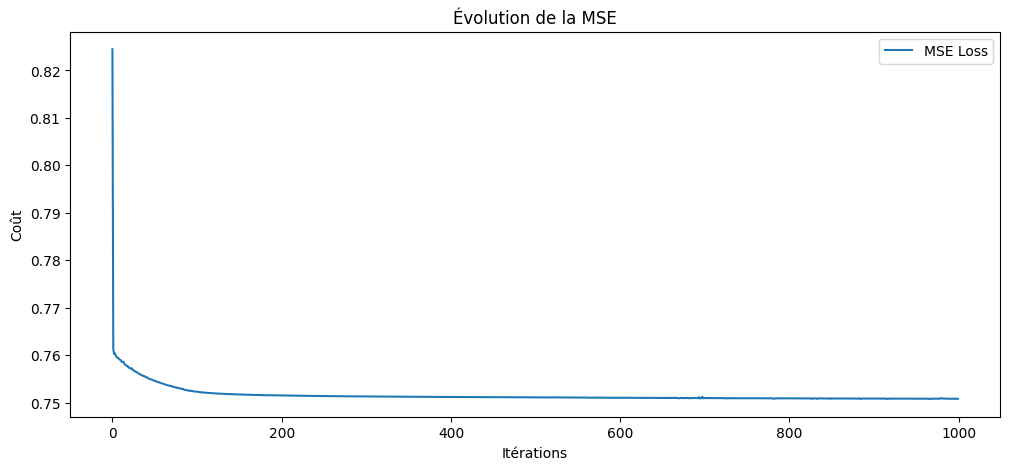

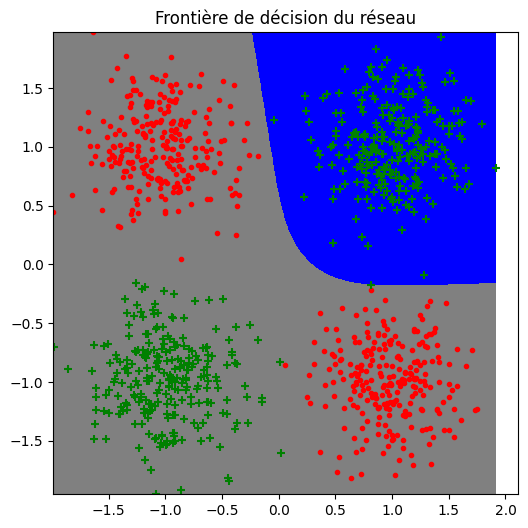

Epoch 0: Loss = 1.2965
Epoch 100: Loss = 1.0000
Epoch 200: Loss = 1.0000
Epoch 300: Loss = 1.0000
Epoch 400: Loss = 1.0000
Epoch 500: Loss = 1.0000
Epoch 600: Loss = 1.0000
Epoch 700: Loss = 1.0000
Epoch 800: Loss = 1.0000
Epoch 900: Loss = 1.0000


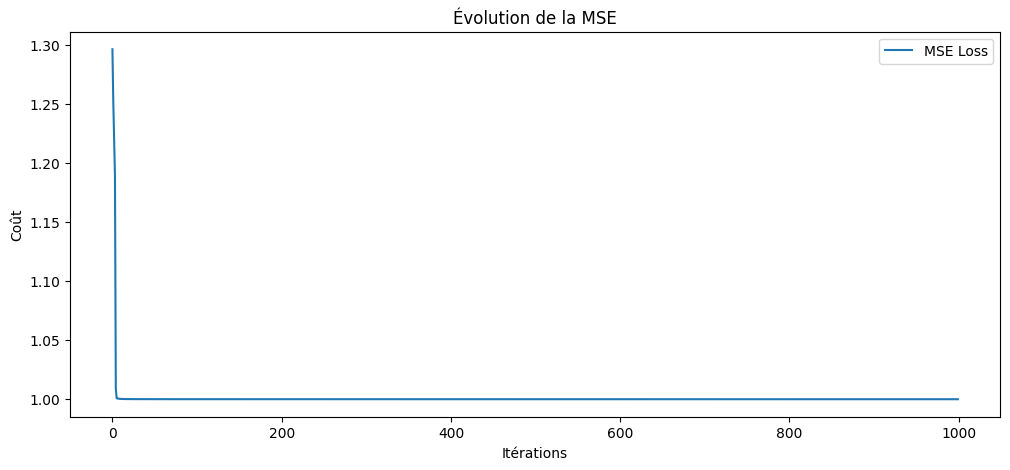

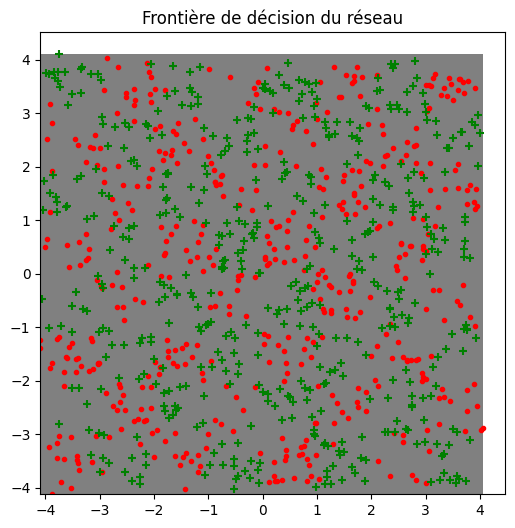

In [2]:
network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5,1),
    Sigmoide()
)


for i in [0,1,2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1) 

    model = network
    loss = MSELoss()

    # Entraînement
    losses, trained_model = train_nn(datax, datay, model, loss, epochs=1000, lr=0.1, batch_size=32)

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model.forward(x)), step=1000)
    plot_data(datax, datay)
    plt.title("Frontière de décision du réseau")
    plt.show()

 

In [3]:
def SGD(network, X_train, y_train, batch_size, epochs, lr):
    loss_fn = MSELoss()
    optimizer = Optim(network, loss_fn, lr)

    for epoch in range(epochs):
        indices = np.random.permutation(len(X_train))
        X_train, y_train = X_train[indices], y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_x = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            optimizer.step(batch_x, batch_y)

        if epoch % 10 == 0:
            y_pred = network.forward(X_train)
            loss = loss_fn.forward(y_train, y_pred)
            print(f"Epoch {epoch}: Loss = {loss.mean():.4f}")

np.random.seed(0)
X_train = np.random.randn(1000, 2)
y_train = (X_train[:, 0] * X_train[:, 1] > 0).astype(float).reshape(-1, 1)  

network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)

SGD(network, X_train, y_train, batch_size=32, epochs=500, lr=0.1)

Epoch 0: Loss = 0.2935
Epoch 10: Loss = 0.1714
Epoch 20: Loss = 0.1221
Epoch 30: Loss = 0.0982
Epoch 40: Loss = 0.0853
Epoch 50: Loss = 0.0774
Epoch 60: Loss = 0.0721
Epoch 70: Loss = 0.0683
Epoch 80: Loss = 0.0653
Epoch 90: Loss = 0.0632
Epoch 100: Loss = 0.0610
Epoch 110: Loss = 0.0594
Epoch 120: Loss = 0.0580
Epoch 130: Loss = 0.0567
Epoch 140: Loss = 0.0556
Epoch 150: Loss = 0.0546
Epoch 160: Loss = 0.0536
Epoch 170: Loss = 0.0529
Epoch 180: Loss = 0.0519
Epoch 190: Loss = 0.0512
Epoch 200: Loss = 0.0505
Epoch 210: Loss = 0.0499
Epoch 220: Loss = 0.0493
Epoch 230: Loss = 0.0486
Epoch 240: Loss = 0.0481
Epoch 250: Loss = 0.0475
Epoch 260: Loss = 0.0471
Epoch 270: Loss = 0.0466
Epoch 280: Loss = 0.0462
Epoch 290: Loss = 0.0457
Epoch 300: Loss = 0.0453
Epoch 310: Loss = 0.0449
Epoch 320: Loss = 0.0444
Epoch 330: Loss = 0.0440
Epoch 340: Loss = 0.0437
Epoch 350: Loss = 0.0433
Epoch 360: Loss = 0.0429
Epoch 370: Loss = 0.0426
Epoch 380: Loss = 0.0423
Epoch 390: Loss = 0.0419
Epoch 400: 

# Pas mal !

Epoch 0: Loss = 1.3141
Epoch 100: Loss = 0.5081
Epoch 200: Loss = 0.5036
Epoch 300: Loss = 0.5023
Epoch 400: Loss = 0.5017


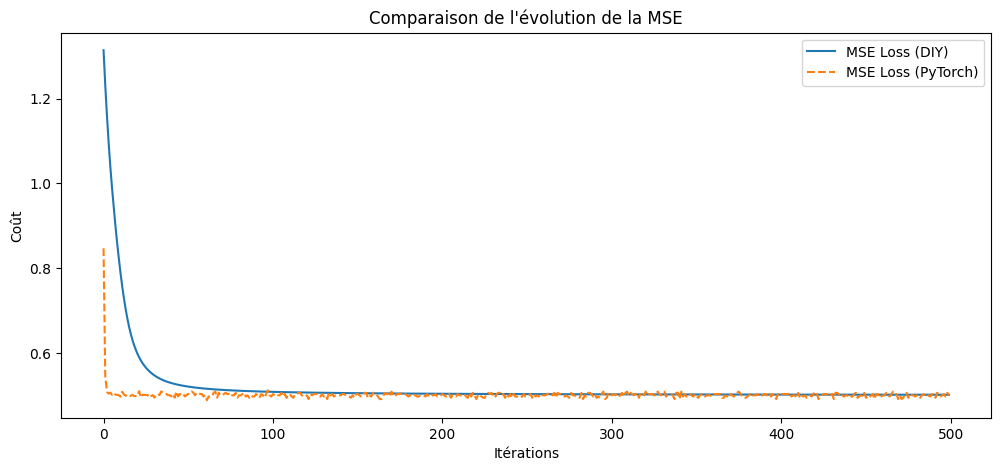

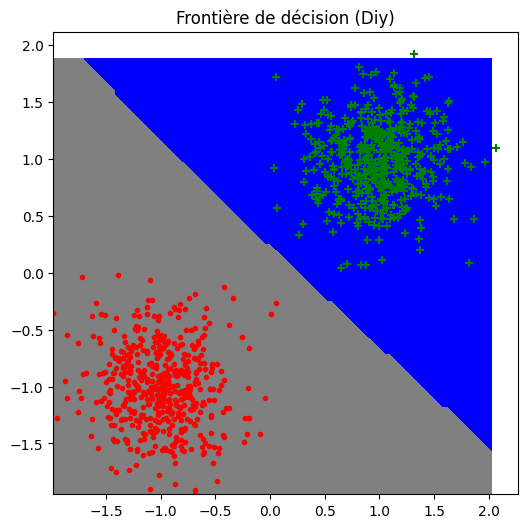

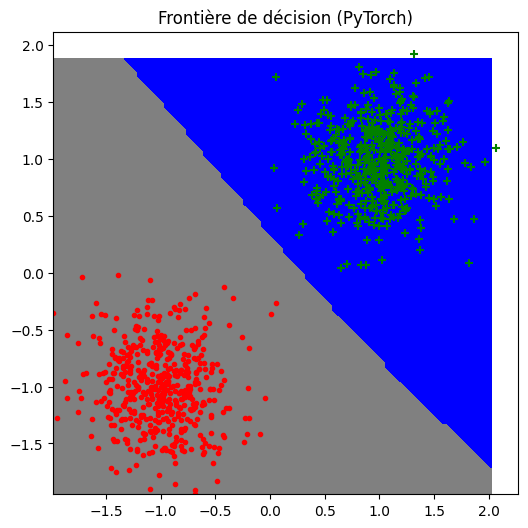

Epoch 0: Loss = 0.9529
Epoch 100: Loss = 0.7658
Epoch 200: Loss = 0.7619
Epoch 300: Loss = 0.7590
Epoch 400: Loss = 0.7557


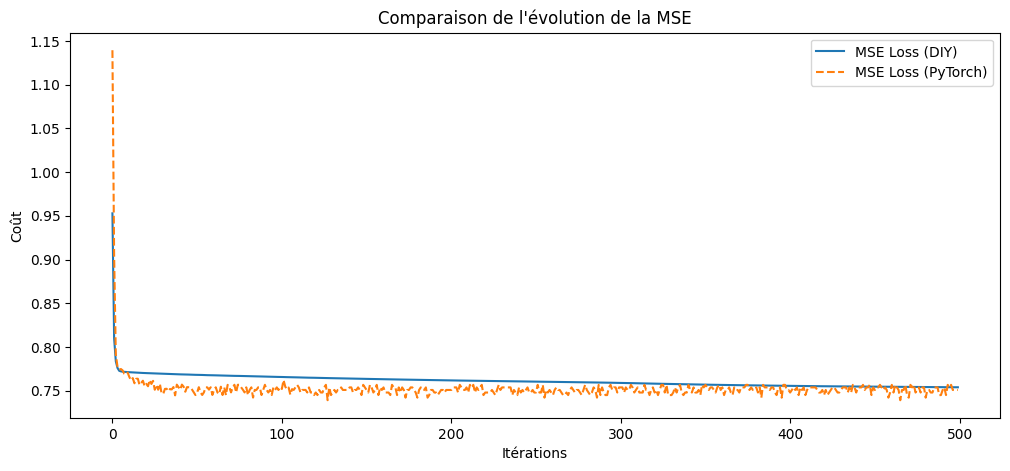

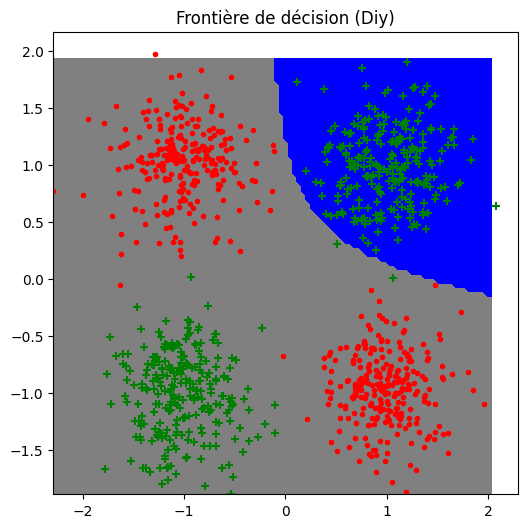

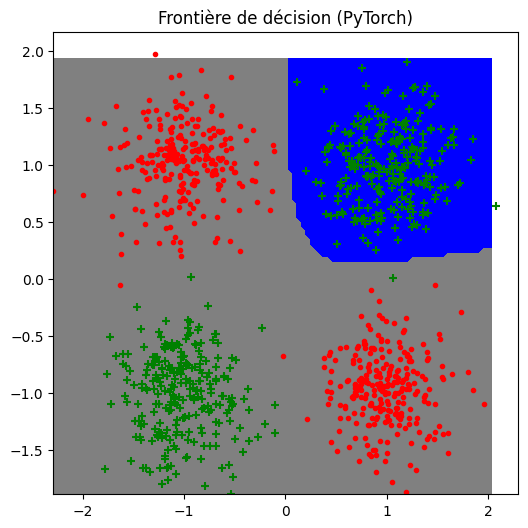

Epoch 0: Loss = 1.2687
Epoch 100: Loss = 0.9996
Epoch 200: Loss = 0.9979
Epoch 300: Loss = 0.9920
Epoch 400: Loss = 0.9891


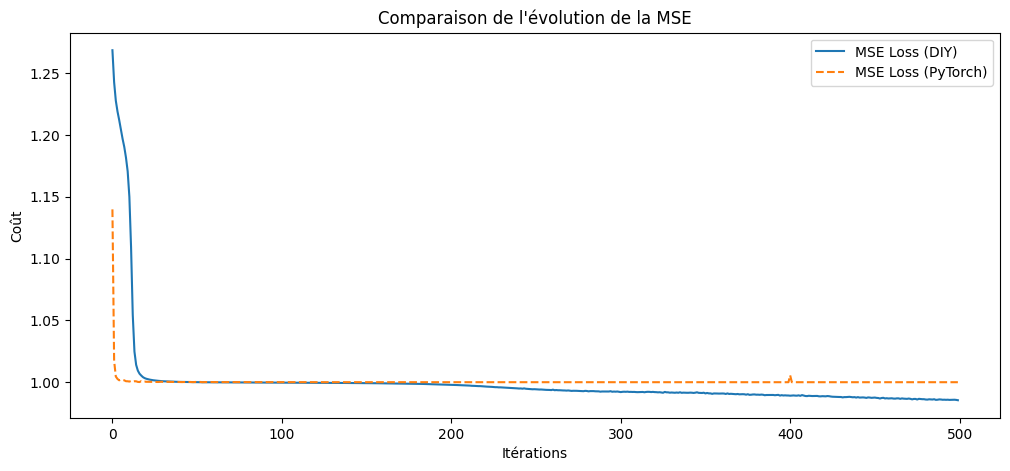

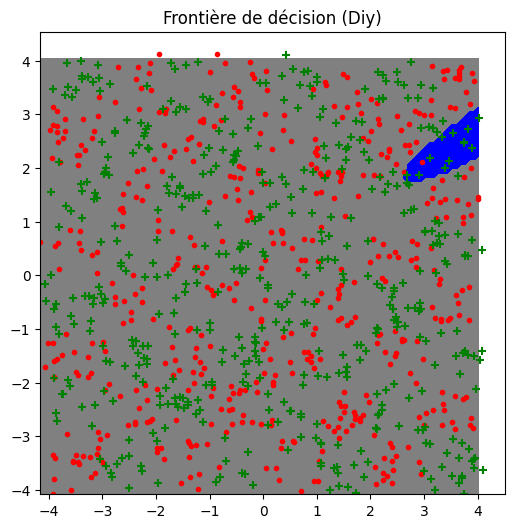

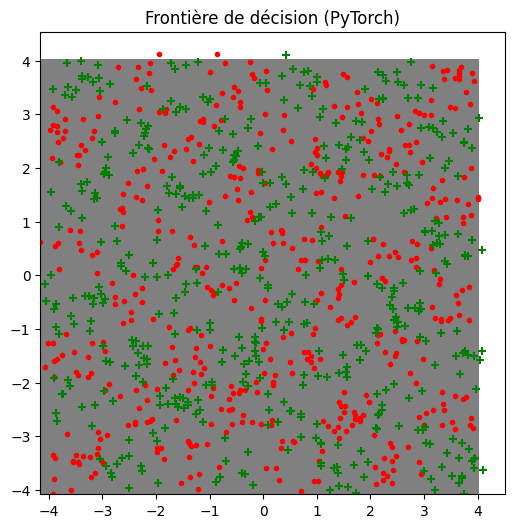

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)


class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

def train_pytorch_nn(X, Y, model, loss_fn, optimizer, epochs=500, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)

    dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_X, batch_Y in dataloader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    
    return losses, model

for i in [0, 1, 2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    #Modèle DIY
    model_diy = network
    loss_diy = MSELoss()
    losses_diy, trained_model_diy = train_nn(datax, datay, model_diy, loss_diy, epochs=500, lr=0.01, batch_size=32)

    # Modèle PyTorch
    model_torch = PyTorchNN()
    loss_torch = nn.MSELoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.01)
    losses_torch, trained_model_torch = train_pytorch_nn(datax, datay, model_torch, loss_torch, optimizer, epochs=500, batch_size=32)

    # Courbes de perte
    plt.figure(figsize=(12, 5))
    plt.plot(losses_diy, label="MSE Loss (DIY)")
    plt.plot(losses_torch, label="MSE Loss (PyTorch)", linestyle="dashed")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Comparaison de l'évolution de la MSE")
    plt.legend()
    plt.show()

    # Frontières de décision
    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_diy.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (Diy)")
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_torch(torch.tensor(x, dtype=torch.float32)).detach().numpy()), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (PyTorch)")
    plt.show()


In [5]:
import numpy as np

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [1], [1], [0]])  # XOR

model = Sequentiel(
    Linear(2, 4),  
    TanH(),
    Linear(4, 1),  
    Sigmoide()
)

loss = MSELoss()  
optime = Optim(model, loss, 0.1)  

def train(net, loss, optime, X_train, y_train, epochs=1000):
    for epoch in range(epochs):
        optime.step(X_train, y_train) 
        if epoch % 100 == 0:
            y_hat = net.forward(X_train)
            print(f"Epoch {epoch}, Loss: {loss.forward(y_train, y_hat).mean()}")

# Entraînement du réseau
train(model, loss, optime, X_train, y_train, epochs=1000)

# Test du modèle
print("\nPrédictions après entraînement :")
print(model.forward(X_train))


Epoch 0, Loss: 0.29087782808644935
Epoch 100, Loss: 0.250476143014664
Epoch 200, Loss: 0.24941792480183156
Epoch 300, Loss: 0.24826856071102218
Epoch 400, Loss: 0.24661206059715451
Epoch 500, Loss: 0.2437994034248027
Epoch 600, Loss: 0.23863415623805775
Epoch 700, Loss: 0.22899608513358422
Epoch 800, Loss: 0.2121443830752866
Epoch 900, Loss: 0.1874115944014173

Prédictions après entraînement :
[[0.33843108]
 [0.5185128 ]
 [0.68867721]
 [0.42967543]]


Epoch 0: Loss = 0.2625
Epoch 100: Loss = 0.0870
Epoch 200: Loss = 0.0736
Epoch 300: Loss = 0.0373
Epoch 400: Loss = 0.0119


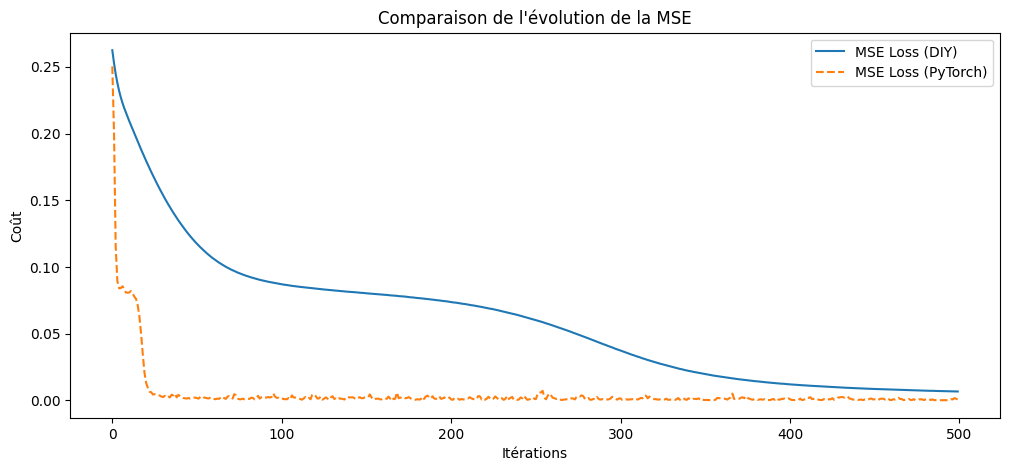

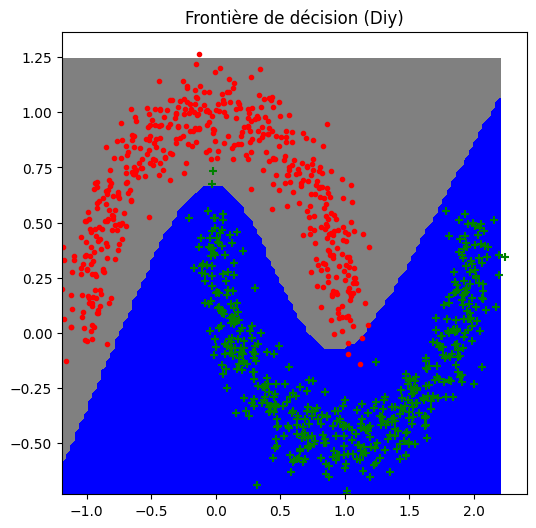

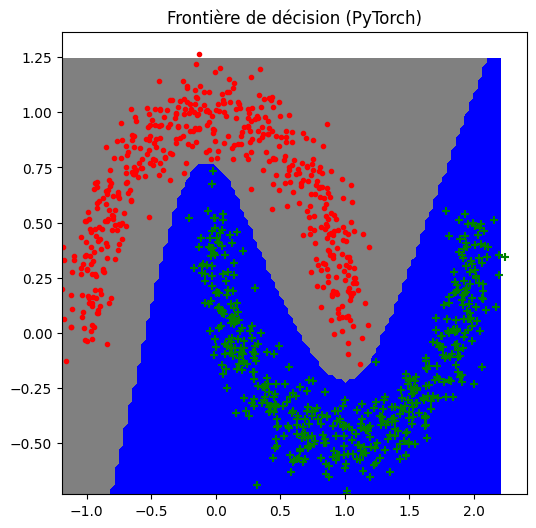

Epoch 0: Loss = 0.3628
Epoch 100: Loss = 0.2584
Epoch 200: Loss = 0.1647
Epoch 300: Loss = 0.1274
Epoch 400: Loss = 0.1199


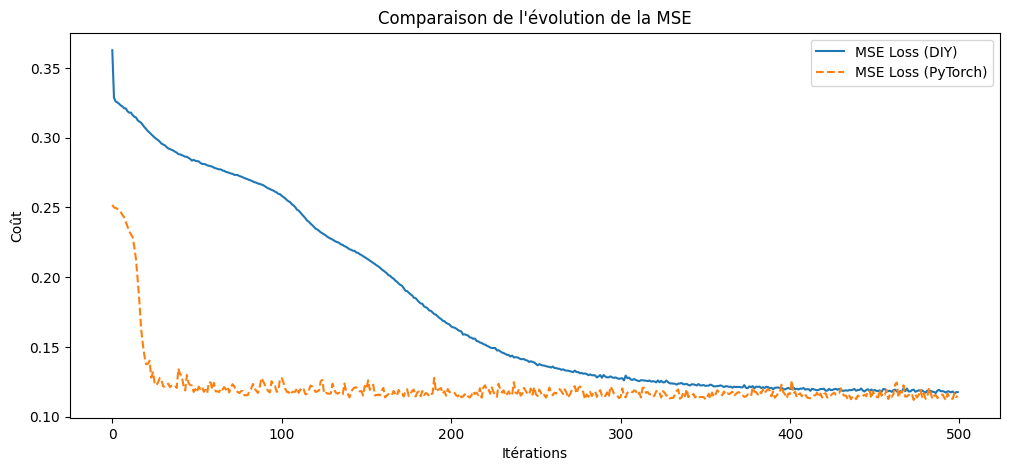

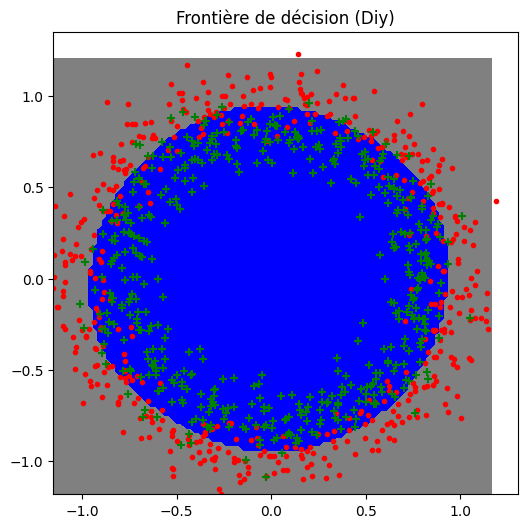

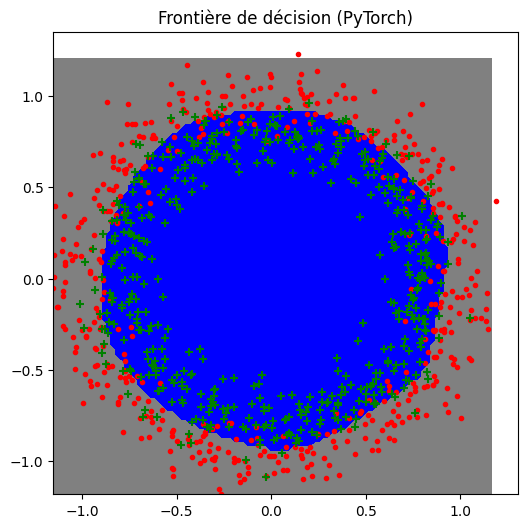

Epoch 0: Loss = 0.4750
Epoch 100: Loss = 0.0193
Epoch 200: Loss = 0.0184
Epoch 300: Loss = 0.0178
Epoch 400: Loss = 0.0172


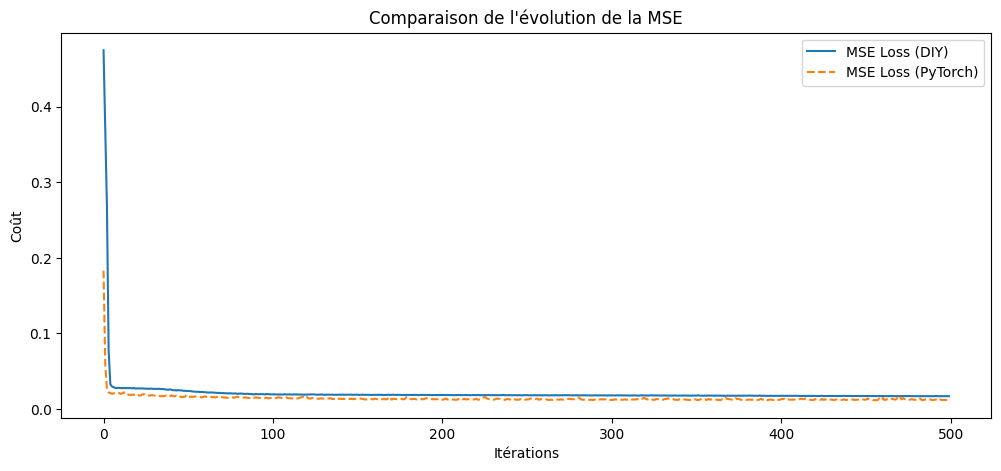

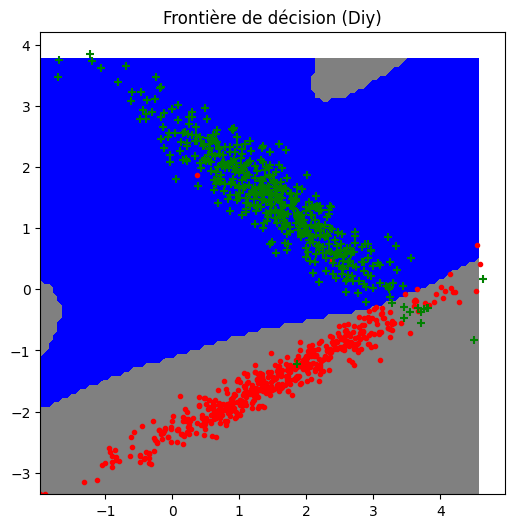

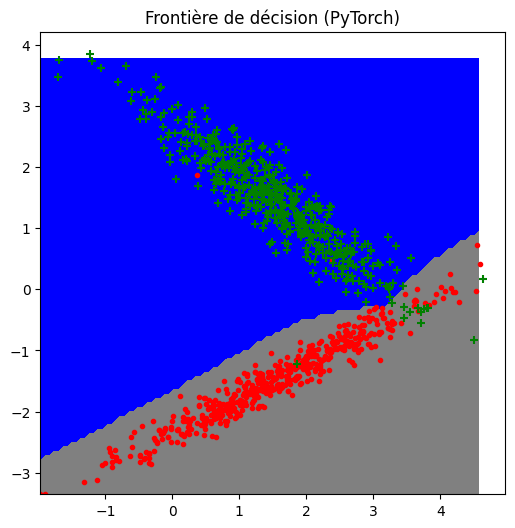

In [8]:
def train_pytorch_nn(X, Y, model, loss_fn, optimizer, epochs=500, batch_size=32):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)

    dataset = torch.utils.data.TensorDataset(X_tensor, Y_tensor)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    losses = []
    for epoch in range(epochs):
        epoch_loss = 0
        for batch_X, batch_Y in dataloader:
            optimizer.zero_grad()
            output = model(batch_X)
            loss = loss_fn(output, batch_Y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(dataloader))
    
    return losses, model

network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)


class PyTorchNN(nn.Module):
    def __init__(self):
        super(PyTorchNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 5),
            nn.Tanh(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

for i in [0, 1, 2]:
    datax, datay = gen_arti2(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1)

    #Modèle DIY
    model_diy = network
    loss_diy = MSELoss()
    losses_diy, trained_model_diy = train_nn(datax, datay, model_diy, loss_diy, epochs=500, lr=0.01, batch_size=32)

    # Modèle PyTorch
    model_torch = PyTorchNN()
    loss_torch = nn.MSELoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.01)
    losses_torch, trained_model_torch = train_pytorch_nn(datax, datay, model_torch, loss_torch, optimizer, epochs=500, batch_size=64)

    # Courbes de perte
    plt.figure(figsize=(12, 5))
    plt.plot(losses_diy, label="MSE Loss (DIY)")
    plt.plot(losses_torch, label="MSE Loss (PyTorch)", linestyle="dashed")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Comparaison de l'évolution de la MSE")
    plt.legend()
    plt.show()

    # Frontières de décision
    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_diy.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (Diy)")
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model_torch(torch.tensor(x, dtype=torch.float32)).detach().numpy()), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision (PyTorch)")
    plt.show()
